<a href="https://colab.research.google.com/github/Alvaro-Garcia-Parra/AA_GRUPO3/blob/main/LAB01_Pr3Olimpiadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
# Importación de librerías a utilizar
import mlxtend
from mlxtend.frequent_patterns import association_rules, apriori
from mlxtend import frequent_patterns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
# Lectura de la base de datos
filename = 'olimpiadas.csv'
data = pd.read_csv(filename, sep = ',')

# Revisión de los datos
print(data.dtypes)
data.head(10)

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [56]:
# Creamos el nuevo dataset con las variables necesarias
data = data[['Name','Sex','Age','Height','Weight','NOC','Games','Event','Medal']]
data

,Name,Sex,Age,Height,Weight,NOC,Games,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...
271111,Andrzej ya,M,29.0,179.0,89.0,POL,1976 Winter,Luge Mixed (Men)'s Doubles,NaN
271112,Piotr ya,M,27.0,176.0,59.0,POL,2014 Winter,"Ski Jumping Men's Large Hill, Individual",NaN
271113,Piotr ya,M,27.0,176.0,59.0,POL,2014 Winter,"Ski Jumping Men's Large Hill, Team",NaN
271114,Tomasz Ireneusz ya,M,30.0,185.0,96.0,POL,1998 Winter,Bobsleigh Men's Four,NaN


In [57]:
data.info(verbose=True, null_counts=True)

<ipython-input-57-c1a516913eb1>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  data.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    271116 non-null  object 
 1   Sex     271116 non-null  object 
 2   Age     261642 non-null  float64
 3   Height  210945 non-null  float64
 4   Weight  208241 non-null  float64
 5   NOC     271116 non-null  object 
 6   Games   271116 non-null  object 
 7   Event   271116 non-null  object 
 8   Medal   39783 non-null   object 
dtypes: float64(3), object(6)
memory usage: 18.6+ MB


In [58]:
data['Age'].fillna(data['Age'].mean(), inplace = True)
data['Height'].fillna(data['Height'].mean(), inplace = True)
data['Weight'].fillna(data['Weight'].mean(), inplace = True)
data['Medal'].fillna('No medal', inplace = True)

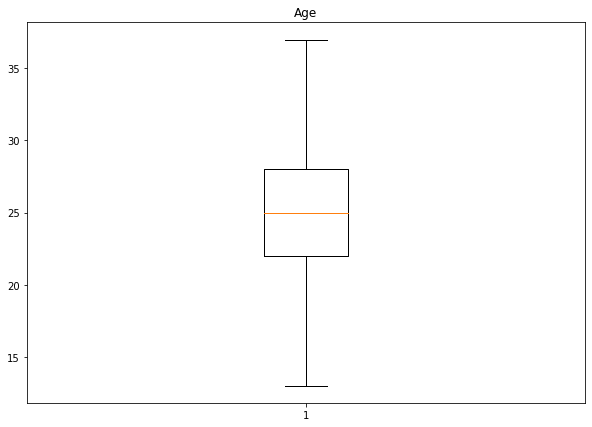

In [59]:
# Vemos los outliers

fig = plt.figure(figsize =(10, 7))

# Crear gráfico
ax = fig.add_subplot(111)
ax.boxplot(data["Age"], showfliers=False)
ax.set_title('Age')

# Dibujar gráfico
plt.show()

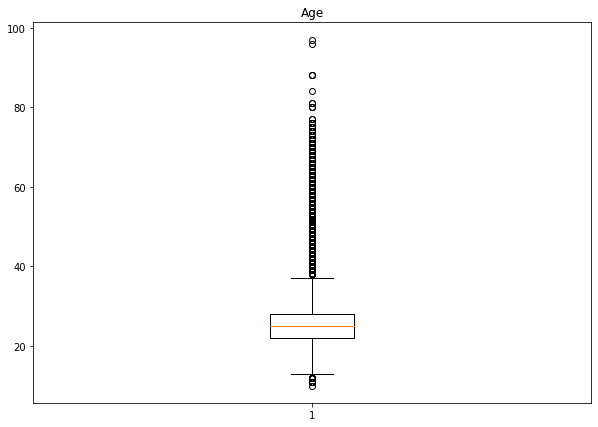

In [60]:
# Vemos los outliers

fig = plt.figure(figsize =(10, 7))

# Crear gráfico
ax = fig.add_subplot(111)
ax.boxplot(data["Age"])
ax.set_title('Age')

# Dibujar gráfico
plt.show()

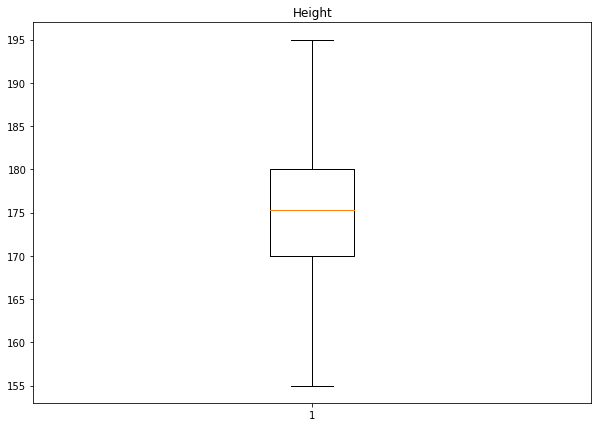

In [61]:
# Vemos los outliers

fig = plt.figure(figsize =(10, 7))

# Crear gráfico
ax = fig.add_subplot(111)
ax.boxplot(data["Height"], showfliers=False)
ax.set_title('Height')

# Dibujar gráfico
plt.show()

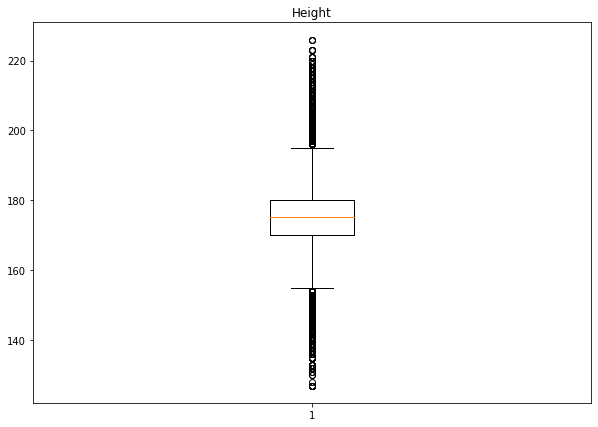

In [62]:
# Vemos los outliers

fig = plt.figure(figsize =(10, 7))

# Crear gráfico
ax = fig.add_subplot(111)
ax.boxplot(data["Height"])
ax.set_title('Height')

# Dibujar gráfico
plt.show()

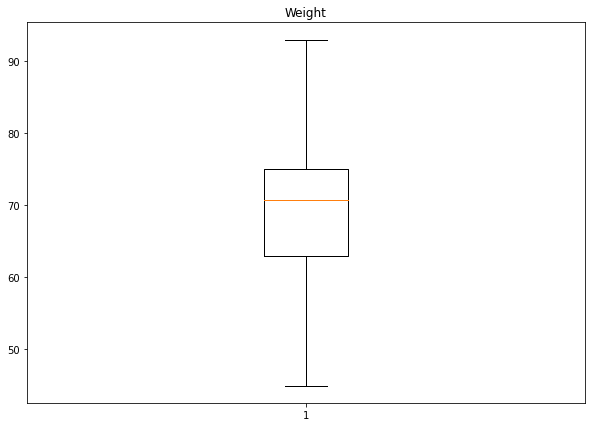

In [63]:
# Vemos los outliers

fig = plt.figure(figsize =(10, 7))

# Crear gráfico
ax = fig.add_subplot(111)
ax.boxplot(data["Weight"], showfliers=False)
ax.set_title('Weight')

# Dibujar gráfico
plt.show()

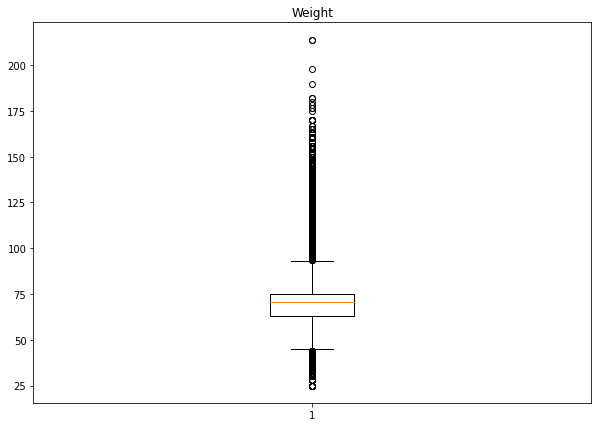

In [64]:
# Vemos los outliers

fig = plt.figure(figsize =(10, 7))

# Crear gráfico
ax = fig.add_subplot(111)
ax.boxplot(data["Weight"])
ax.set_title('Weight')

# Dibujar gráfico
plt.show()

In [65]:
from math import floor
from math import ceil

# Edad
# calcular el rango intercuartílico  
q3, q1 = np.percentile(data['Age'], [75, 25])
iqr = q3 - q1

max = q3 + 1.5*iqr
min = q1 - 1.5*iqr

# Primer rango: Poco disponible
data['Age_Cat'] = 'Joven'

# Segundo rango: Disponible normalmente
data.loc[(data['Age'] >= min) & (data['Age'] < max), 'Age_Cat'] = 'Edad Media'

# Primer rango: Altamente disponible
data.loc[(data['Age'] >= max), 'Age_Cat'] = 'Mayor'

# Height
# calcular el rango intercuartílico  
q3, q1 = np.percentile(data['Height'], [75, 25])
iqr = q3 - q1

max = q3 + 1.5*iqr
min = q1 - 1.5*iqr

# Primer rango: Poco disponible
data['Height_Cat'] = 'Bajo'

# Segundo rango: Disponible normalmente
data.loc[(data['Height'] >= min) & (data['Height'] < max), 'Height_Cat'] = 'Medio'

# Primer rango: Altamente disponible
data.loc[(data['Height'] >= max), 'Height_Cat'] = 'Alto'

# Weight
# calcular el rango intercuartílico  
q3, q1 = np.percentile(data['Weight'], [75, 25])
iqr = q3 - q1

max = q3 + 1.5*iqr
min = q1 - 1.5*iqr

# Primer rango: Poco disponible
data['Weight_Cat'] = 'Delgado'

# Segundo rango: Disponible normalmente
data.loc[(data['Weight'] >= min) & (data['Weight'] < max), 'Weight_Cat'] = 'En forma'

# Primer rango: Altamente disponible
data.loc[(data['Weight'] >= max), 'Weight_Cat'] = 'Pesado'

In [66]:
data.head(50)

,Name,Sex,Age,Height,Weight,NOC,Games,Event,Medal,Age_Cat,Height_Cat,Weight_Cat
0,A Dijiang,M,24.0,180.00000,80.000000,CHN,1992 Summer,Basketball Men's Basketball,No medal,Edad Media,Medio,En forma
1,A Lamusi,M,23.0,170.00000,60.000000,CHN,2012 Summer,Judo Men's Extra-Lightweight,No medal,Edad Media,Medio,En forma
2,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,DEN,1920 Summer,Football Men's Football,No medal,Edad Media,Medio,En forma
3,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,DEN,1900 Summer,Tug-Of-War Men's Tug-Of-War,Gold,Edad Media,Medio,En forma
4,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,NED,1988 Winter,Speed Skating Women's 500 metres,No medal,Edad Media,Medio,En forma
5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,NED,1988 Winter,"Speed Skating Women's 1,000 metres",No medal,Edad Media,Medio,En forma
6,Christine Jacoba Aaftink,F,25.0,185.00000,82.000000,NED,1992 Winter,Speed Skating Women's 500 metres,No medal,Edad Media,Medio,En forma
7,Christine Jacoba Aaftink,F,25.0,185.00000,82.000000,NED,1992 Winter,"Speed Skating Women's 1,000 metres",No medal,Edad Media,Medio,En forma
8,Christine Jacoba Aaftink,F,27.0,185.00000,82.000000,NED,1994 Winter,Speed Skating Women's 500 metres,No medal,Edad Media,Medio,En forma
9,Christine Jacoba Aaftink,F,27.0,185.00000,82.000000,NED,1994 Winter,"Speed Skating Women's 1,000 metres",No medal,Edad Media,Medio,En forma


In [67]:
data_train = data.iloc[:215000]
data_test = data.iloc[215000:]

In [68]:
data_train

,Name,Sex,Age,Height,Weight,NOC,Games,Event,Medal,Age_Cat,Height_Cat,Weight_Cat
0,A Dijiang,M,24.0,180.00000,80.000000,CHN,1992 Summer,Basketball Men's Basketball,No medal,Edad Media,Medio,En forma
1,A Lamusi,M,23.0,170.00000,60.000000,CHN,2012 Summer,Judo Men's Extra-Lightweight,No medal,Edad Media,Medio,En forma
2,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,DEN,1920 Summer,Football Men's Football,No medal,Edad Media,Medio,En forma
3,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,DEN,1900 Summer,Tug-Of-War Men's Tug-Of-War,Gold,Edad Media,Medio,En forma
4,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,NED,1988 Winter,Speed Skating Women's 500 metres,No medal,Edad Media,Medio,En forma
...,...,...,...,...,...,...,...,...,...,...,...,...
214995,Tasha Schwikert-Warren,F,15.0,175.33897,70.702393,USA,2000 Summer,Gymnastics Women's Team All-Around,Bronze,Edad Media,Medio,En forma
214996,Tasha Schwikert-Warren,F,15.0,175.33897,70.702393,USA,2000 Summer,Gymnastics Women's Uneven Bars,No medal,Edad Media,Medio,En forma
214997,Tasha Schwikert-Warren,F,15.0,175.33897,70.702393,USA,2000 Summer,Gymnastics Women's Balance Beam,No medal,Edad Media,Medio,En forma
214998,Peter Schwimmbeck,M,22.0,170.00000,70.000000,GER,1964 Winter,Ice Hockey Men's Ice Hockey,No medal,Edad Media,Medio,En forma
